Tutorial on YouTube Chanel:
Text Visualization | Lecture 2 | CPE 393 Text Analytics
https://www.youtube.com/watch?v=rAQCQKnkNh0&t=774s

##### <b>Load Dataset</b>

In [16]:
import pandas as pd
import numpy as np
import matplotlib as plt

In [17]:
df = pd.read_csv('un-general-debates.csv')
df.sample(5)

,session,year,country,text
3657,60,2005,GRD,I am indeed greatly\nhonoured to join those wh...
3574,54,1999,SWZ,I am honoured to address the\nGeneral Assembly...
1183,57,2002,FSM,﻿I would like to take this\nopportunity to con...
2255,65,2010,AND,It is certainly a great opportunity for the \...
5150,66,2011,NOR,"Since we last met here, \nmajor changes have s..."


In [18]:
df.count()

session    7507
year       7507
country    7507
text       7507
dtype: int64

In [19]:
# Primary key

df[['session', 'country']].drop_duplicates().count()

session    7507
country    7507
dtype: int64

##### <b>DataFrame Summary Statistics</b>

In [20]:
df['length'] = df['text'].str.len()

In [21]:
df.columns

Index(['session', 'year', 'country', 'text', 'length'], dtype='object')

In [22]:
df.dtypes

session     int64
year        int64
country    object
text       object
length      int64
dtype: object

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7507 entries, 0 to 7506
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   session  7507 non-null   int64 
 1   year     7507 non-null   int64 
 2   country  7507 non-null   object
 3   text     7507 non-null   object
 4   length   7507 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 293.4+ KB


In [24]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
session,7507.0,49.610763,12.892155,25.0,39.0,51.0,61.0,70.0
year,7507.0,1994.610763,12.892155,1970.0,1984.0,1996.0,2006.0,2015.0
length,7507.0,17967.281604,7860.038463,2362.0,12077.0,16424.0,22479.5,72041.0


In [25]:
df[['country']].describe(include='O').T

,count,unique,top,freq
country,7507,199,IRN,46


##### <b>Check Missing Data</b>

In [26]:
df.isna().sum()

session    0
year       0
country    0
text       0
length     0
dtype: int64

##### <b>Plotting distribution</b>

<AxesSubplot:>

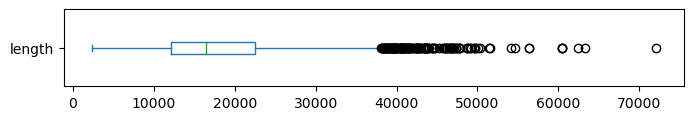

In [27]:
df['length'].plot(kind='box', vert=False, figsize=(8,1))

<AxesSubplot:ylabel='Frequency'>

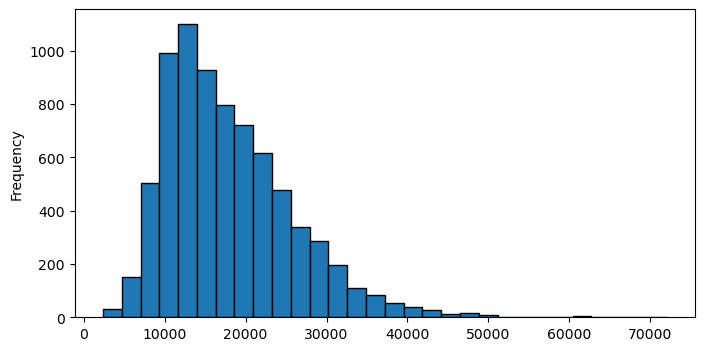

In [28]:
df['length'].plot(kind='hist', bins=30, figsize=(8,4), edgecolor='k')

##### <b>Distribution across categories</b>

c:\Users\samapant\Anaconda3\Anaconda\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


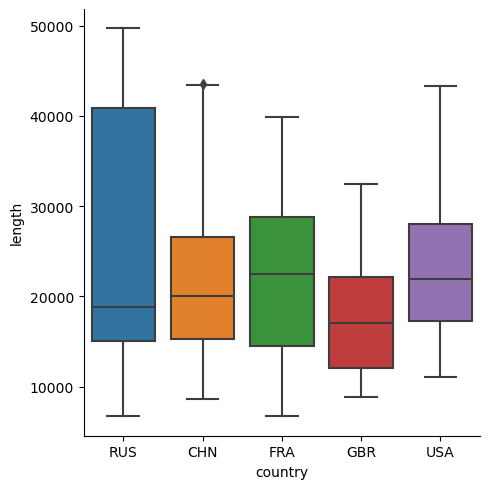

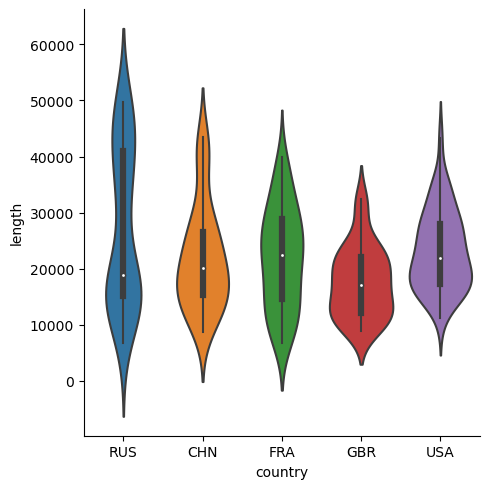

In [29]:
import seaborn as sns

where = df['country'].isin(['USA', 'FRA', 'GBR', 'CHN', 'RUS'])
sns.catplot(data=df[where], x='country', y='length', kind='box')
sns.catplot(data=df[where], x='country', y='length', kind='violin')

##### <b>Developement over time Number of countries</b>

<AxesSubplot:title={'center':'Number of Countries'}, xlabel='year'>

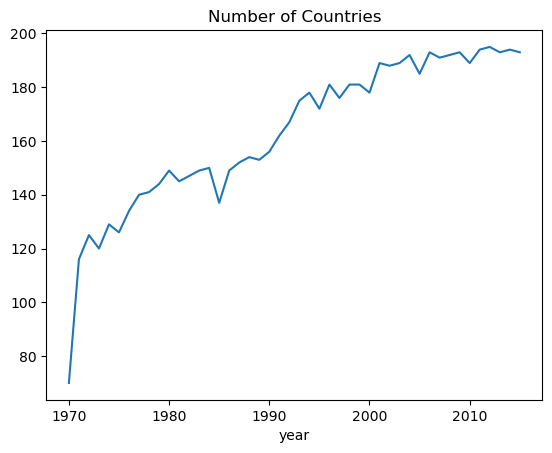

In [30]:
df.groupby('year').size().plot(title='Number of Countries')

<AxesSubplot:title={'center':'Avg. Speech Length'}, xlabel='year'>

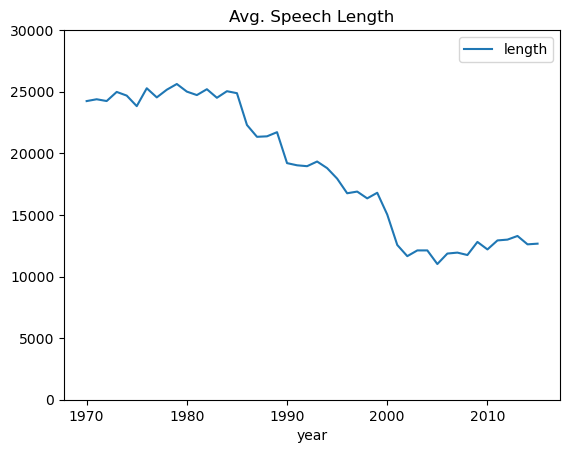

In [31]:
df.groupby('year').agg({'length':'mean'}).plot(title='Avg. Speech Length', ylim=(0,30000))

##### <b>Simple Text Processing</b>

In [32]:
# Case Folding
str.lower('Hello World')

'hello world'

In [33]:
# Tokenization

import regex as re
def tokenize(text):
    return re.findall(r'[\w-]*\p{L}[\w-]*', text)

In [34]:
text = "Let's defeat SARS-Coc-2 together in 2021!"
tokens = tokenize(text)
print("|".join(tokens))

Let|s|defeat|SARS-Coc-2|together|in


In [35]:
# Stop word removal
import nltk
nltk.download('stopwords')

stopwords = set(nltk.corpus.stopwords.words('english'))
stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\samapant\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [36]:
def remove_stop(tokens):
    return [t for t in tokens if t.lower() not in stopwords]

In [37]:
remove_stop(tokens)

['Let', 'defeat', 'SARS-Coc-2', 'together']

In [38]:
# Processing a pipeline

pipeline = [str.lower, tokenize, remove_stop]

def prepare(text, pipeline):
    tokens = text
    for transform in pipeline:
        tokens = transform(tokens)
    return tokens

In [39]:
prepare(text, pipeline)

['let', 'defeat', 'sars-coc-2', 'together']

In [40]:
# Apply pipeline

# Series: map
# Series: map
# DaraFrame: applymap
# DataFrame: applymap

df['tokens'] = df['text'].apply(prepare, pipeline=pipeline)
df.sample(10)

,session,year,country,text,length,tokens
5626,48,1993,SLE,"Last year, my Head of\nState, Captain Valentin...",28956,"[last, year, head, state, captain, valentine, ..."
4009,37,1982,GHA,It is with particular pleasure that I join \np...,19928,"[particular, pleasure, join, previous, speaker..."
690,63,2008,BLZ,On behalf of the \nGovernment and people of Be...,12964,"[behalf, government, people, belize, congratul..."
4742,35,1980,NOR,"﻿Mr. President, it gives me great pleasure to ...",23594,"[mr, president, gives, great, pleasure, see, d..."
238,68,2013,ECU,"It is an honour, Mr. President, for me to addr...",10120,"[honour, mr, president, address, general, asse..."
574,63,2008,AGO,I am \nparticularly honoured to address the Ge...,10742,"[particularly, honoured, address, general, ass..."
7083,61,2006,FJI,"I extend to you, Madam, the \ncongratulations ...",11303,"[extend, madam, congratulations, best, wishes,..."
2866,64,2009,HUN,Allow me at the outset to \ncongratulate the P...,9062,"[allow, outset, congratulate, president, assum..."
6146,55,2000,QAT,I should like at the outset to extend my\ncong...,18633,"[like, outset, extend, congratulations, mr, ho..."
4237,53,1998,VNM,On behalf of the delegation of the Socialist\n...,19368,"[behalf, delegation, socialist, republic, viet..."


In [41]:
# Counting number of tokens (words)
df['num_tokens'] = df['tokens'].map(len)
df.sample(10)

,session,year,country,text,length,tokens,num_tokens
4434,58,2003,VUT,﻿Allow\nme to convey to this Assembly the hear...,11024,"[allow, convey, assembly, heartfelt, greetings...",905
6607,28,1973,GTM,"﻿197.\tMr. President, the delegation of Guatem...",14700,"[mr, president, delegation, guatemala, conside...",1205
7209,62,2007,SWE,Let me take this \nopportunity to express our ...,9172,"[let, take, opportunity, express, strong, supp...",772
6158,55,2000,GIN,I am\nvery pleased on behalf of the people and...,11519,"[pleased, behalf, people, government, guinea, ...",941
3731,60,2005,AUS,Australia is a founding\nMember of the United ...,12274,"[australia, founding, member, united, nations,...",1039
6942,61,2006,IRL,"Let me begin by \ncongratulating you, Madam Pr...",13443,"[let, begin, congratulating, madam, president,...",1118
6870,27,1972,SOM,"Mr. President, my Foreign Secretary had hoped ...",34848,"[mr, president, foreign, secretary, hoped, abl...",2803
2627,50,1995,EGY,It\ngives me great pleasure to extend to the P...,36281,"[gives, great, pleasure, extend, president, fr...",2973
6116,55,2000,JPN,"First, I would like to\nextend my heartfelt co...",21366,"[first, would, like, extend, heartfelt, congra...",1828
3459,34,1979,COG,﻿Among the events which have shaken the world ...,19644,"[among, events, shaken, world, especially, afr...",1600


##### <b>Word Frequency Analysis</b>

In [44]:
from collections import Counter

tokens = tokenize("She likes my cats and my cats like my sofa")
counter = Counter(tokens)
print(counter)

Counter({'my': 3, 'cats': 2, 'She': 1, 'likes': 1, 'and': 1, 'like': 1, 'sofa': 1})


In [45]:
more_tokens = tokenize("She likes dogs and cats")
counter.update(more_tokens)
print(counter)

Counter({'my': 3, 'cats': 3, 'She': 2, 'likes': 2, 'and': 2, 'like': 1, 'sofa': 1, 'dogs': 1})


In [49]:
%%time
import numpy as np
tokens = df['tokens'].explode().values
counter = Counter(tokens)
# print(counter)
print(counter.most_common(5))

[('nations', 124508), ('united', 120763), ('international', 117223), ('world', 89421), ('countries', 85734)]
Wall time: 1.43 s


In [50]:
%%time
counter = Counter()
df['tokens'].map(counter.update)

print(counter.most_common(5))

[('nations', 124508), ('united', 120763), ('international', 117223), ('world', 89421), ('countries', 85734)]
Wall time: 1.29 s


In [51]:
# Word Counting, DataFrame Version

def count_words(df, column='tokens', preprocess=None, min_freq=2):

    # process tokens and update counter
    def update(doc):
        tokens = doc if preprocess is None else preprocess(doc)
        counter.update(tokens)
    
    # create counter and run through all data
    counter = Counter()
    df[column].map(update)

    # tranform counter into a DataFrame
    freq_df = pd.DataFrame.from_dict(counter, orient='index', columns=['freq'])
    freq_df = freq_df.query('freq > @min_freq')
    freq_df.index.name = 'token'

    return freq_df.sort_values('freq', ascending=False)

In [55]:
freq_df = count_words(df)
freq_df.head(5)

,freq
token,
nations,124508
united,120763
international,117223
world,89421
countries,85734


In [59]:
# Counting words with preprocessing

# Count words with 10 or more characters
count_words(df, column='text',
            preprocess=lambda text: re.findall(r"\w{10,}", text))

,freq
token,
international,106974
development,51334
Government,35528
Organization,33763
developing,25177
...,...
Documentation,3
instrumentation,3
Reorganization,3


##### <b>Frequency Plot</b>

[Text(0.5, 0, 'Frequency'), Text(0, 0.5, 'Token'), Text(0.5, 1.0, 'Top Words')]

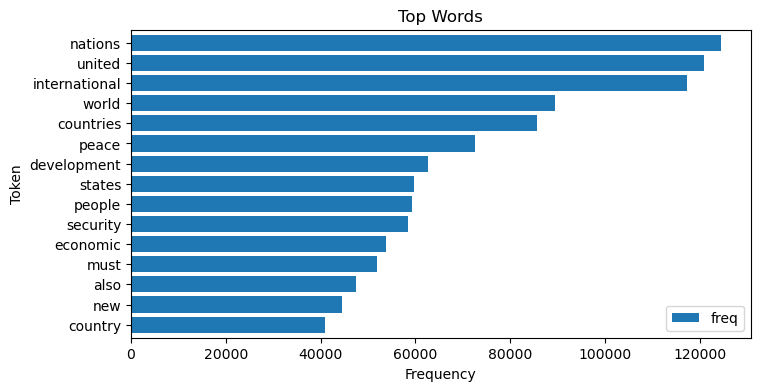

In [60]:
ax = freq_df.head(15).plot(kind='barh', width=0.8, figsize=(8,4))
ax.invert_yaxis()
ax.set(xlabel='Frequency', ylabel='Token', title='Top Words')

##### <b>Word Cloud</b>

In [61]:
!pip install wordcloud

     -------------------------------------- 153.3/153.3 kB 8.3 kB/s eta 0:00:00


In [67]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

text = df.query("year==2015 and country=='USA'")['text'].values[0]
text

'Seventy years after the founding of the United Nations it is worth reflecting on what the members of this body, working together, have helped to achieve. Out of the ashes of the Second World War, having witnessed the unthinkable power of the atomic age, the United States has worked with many nations in the Assembly to prevent a third world war — by forging alliances with old adversaries; by supporting the steady emergence of strong democracies accountable to their people and not to any foreign Power; and by building an international system that imposes a cost on those who choose conflict over cooperation, an order that recognizes the dignity and equal worth of all people.\nThat has been the work of seven decades. That is the ideal that this body has, at its best, pursued. Of course, there have been too many times when, collectively, we have fallen short of those ideals. Over the seven decades, terrible conflicts have claimed untold victims. But we have pressed forward, slowly, steadil

(-0.5, 399.5, 199.5, -0.5)

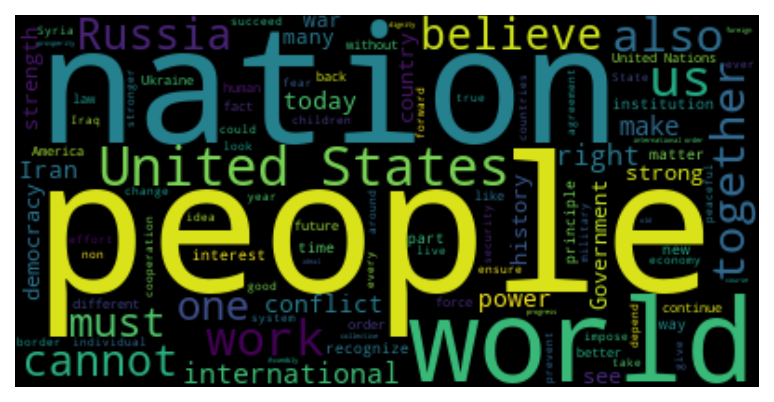

In [69]:
wc = WordCloud(max_words=100, stopwords=stopwords)
wc.generate(text)
plt.figure(dpi=150)
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')

##### <b>Keyword-in-Context Function</b>

In [72]:
!pip install textacy

ERROR: Exception:
Traceback (most recent call last):
  File "C:\Users\samapant\Anaconda3\Anaconda\lib\site-packages\pip\_vendor\urllib3\response.py", line 435, in _error_catcher
    yield
  File "C:\Users\samapant\Anaconda3\Anaconda\lib\site-packages\pip\_vendor\urllib3\response.py", line 516, in read
    data = self._fp.read(amt) if not fp_closed else b""
  File "C:\Users\samapant\Anaconda3\Anaconda\lib\site-packages\pip\_vendor\cachecontrol\filewrapper.py", line 90, in read
    data = self.__fp.read(amt)
  File "C:\Users\samapant\Anaconda3\Anaconda\lib\http\client.py", line 463, in read
    n = self.readinto(b)
  File "C:\Users\samapant\Anaconda3\Anaconda\lib\http\client.py", line 507, in readinto
    n = self.fp.readinto(b)
  File "C:\Users\samapant\Anaconda3\Anaconda\lib\socket.py", line 704, in readinto
    return self._sock.recv_into(b)
  File "C:\Users\samapant\Anaconda3\Anaconda\lib\ssl.py", line 1242, in recv_into
    return self.read(nbytes, buffer)
  File "C:\Users\samapant\

     -------------------------------------- 210.7/210.7 kB 7.0 kB/s eta 0:00:00
                                              0.0/2.0 MB 109.5 kB/s eta 0:00:18


In [71]:
from textacy.extract.kwic import keyword_in_context
import random

def kwic(doc_series, keyword, window=35, print_sample=5):
    def add_kwic(text):
        kwic_list.extend(keyword_in_context(text, keyword, ignore_case=True, window_width=window))

    kwic_list = []
    doc_series.map(add_kwic)

    if print_sample is None or print_sample==0:
        return kwic_list
    else:
        k = min(print_sample, len(kwic_list))
        print(f"{k} random samples out of {len(kwic_list)} " + \
              f"contexts for '{keyword}':")
        for sample in random.sample(list(kwic_list), k):
            print(re.sub(r'[\n\t]', ' ', sample[0]) + ' ' + \
                  sample[1] + ' ' + \
                    re.sub(r'[\n\t]', ' '. sample[2]))

ModuleNotFoundError: No module named 'textacy'

##### <b>Word Cloud Framework</b>

In [ ]:
def wordcloud(word_freq, title=None, max_word=200, stopwords=None):
    wc = WordCloud(width=800, height=400,
                   background_color='black', colormap='Paired',
                   max_font_size=150, max_words=max_word)
    
    # convert data frame into dict